# 檢視與處理 Outliers
## 為何會有 outliers, 常見的 outlier 原因
未知值，隨意填補 (約定俗成的代入)，如年齡常見 0,999
可能的錯誤紀錄/手誤/系統性錯誤，如某本書在某筆訂單的銷售量 = 1000 本

In [1]:
# Import 需要的套件
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline


In [2]:
dir_data = './data/'
f = os.path.join(dir_data, 'application_test.csv')
print('Path of read in data: %s' % (f))
df = pd.read_csv(f)
df.head()

Path of read in data: ./data/application_test.csv


,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100001,Cash loans,F,N,Y,0,135000.0,568800.0,20560.5,450000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
1,100005,Cash loans,M,N,Y,0,99000.0,222768.0,17370.0,180000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
2,100013,Cash loans,M,Y,Y,0,202500.0,663264.0,69777.0,630000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,4.0
3,100028,Cash loans,F,N,Y,2,315000.0,1575000.0,49018.5,1575000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
4,100038,Cash loans,M,Y,N,1,180000.0,625500.0,32067.0,625500.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
df.dtypes.value_counts()

float64    65
int64      40
object     16
dtype: int64

In [4]:
# 先篩選數值型的欄位
dtype_select = [pd.np.dtype('float64'),pd.np.dtype('int64')]
numeric_columns = list(df.columns[list(df.dtypes.isin(dtype_select))])

In [5]:
# 再把只有 2 值 (通常是 0,1) 的欄位去掉
numeric_columns = list(df[numeric_columns].columns[list(df[numeric_columns].apply(lambda x:len(x.unique())!=2))])
print("Numbers of remain columns %s" % len(numeric_columns))

Numbers of remain columns 84


SK_ID_CURR


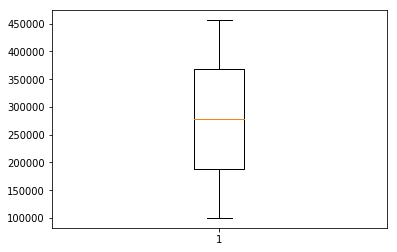

CNT_CHILDREN


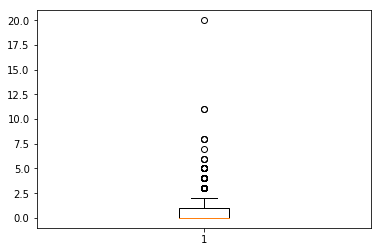

AMT_INCOME_TOTAL


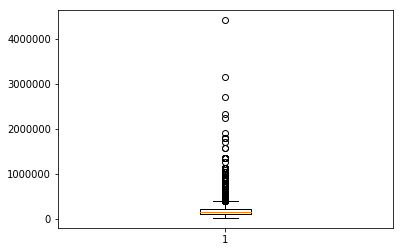

AMT_CREDIT


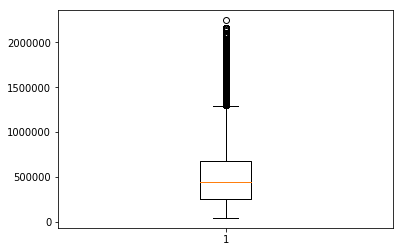

AMT_ANNUITY


C:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\function_base.py:3652: RuntimeWarning: Invalid value encountered in percentile
  interpolation=interpolation)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1874: RuntimeWarning: invalid value encountered in less_equal
  wiskhi = np.compress(x <= hival, x)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1881: RuntimeWarning: invalid value encountered in greater_equal
  wisklo = np.compress(x >= loval, x)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1889: RuntimeWarning: invalid value encountered in less
  np.compress(x < stats['whislo'], x),
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1890: RuntimeWarning: invalid value encountered in greater
  np.compress(x > stats['whishi'], x)


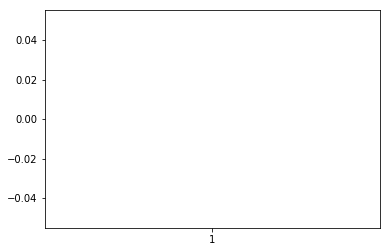

AMT_GOODS_PRICE


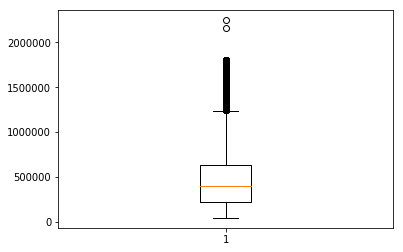

REGION_POPULATION_RELATIVE


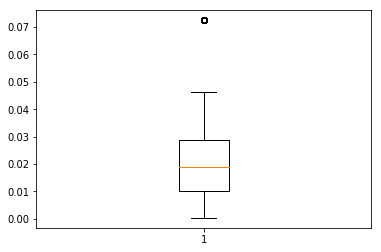

DAYS_BIRTH


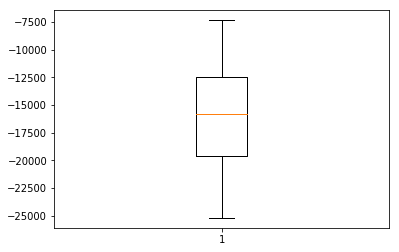

DAYS_EMPLOYED


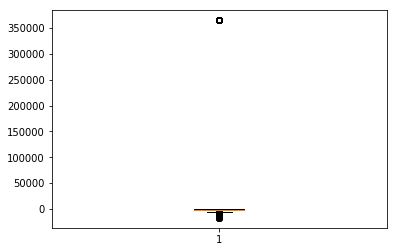

DAYS_REGISTRATION


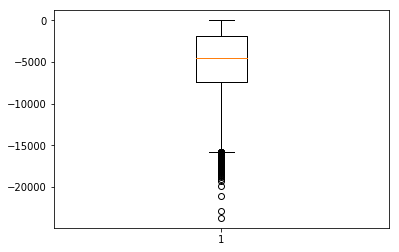

DAYS_ID_PUBLISH


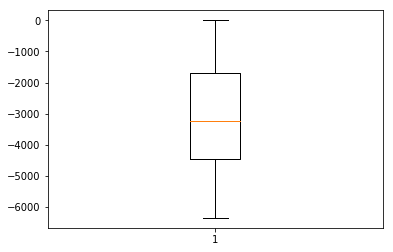

OWN_CAR_AGE


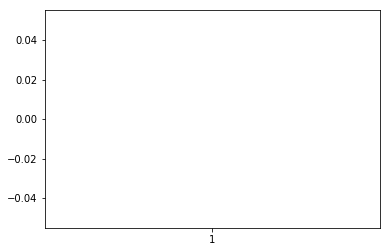

CNT_FAM_MEMBERS


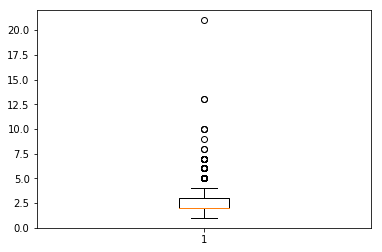

REGION_RATING_CLIENT


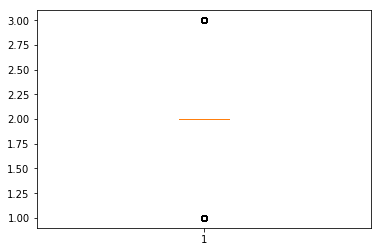

REGION_RATING_CLIENT_W_CITY


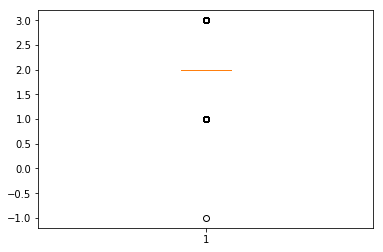

HOUR_APPR_PROCESS_START


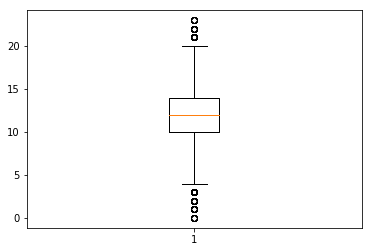

EXT_SOURCE_1


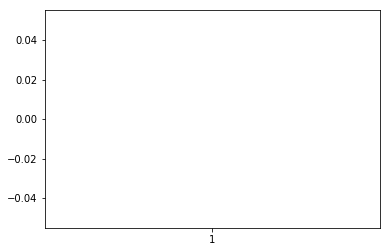

EXT_SOURCE_2


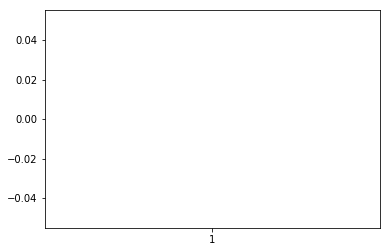

EXT_SOURCE_3


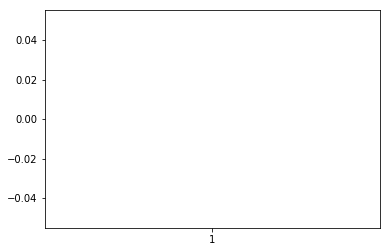

APARTMENTS_AVG


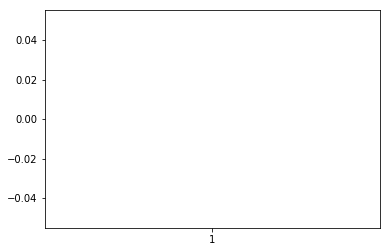

BASEMENTAREA_AVG


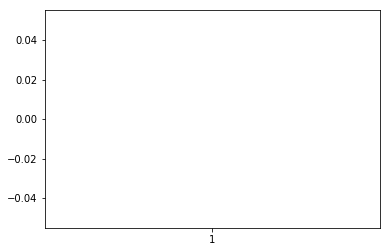

YEARS_BEGINEXPLUATATION_AVG


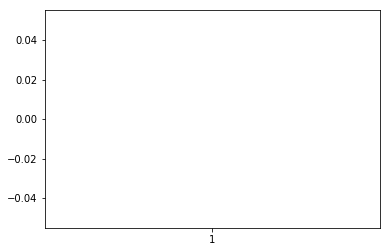

YEARS_BUILD_AVG


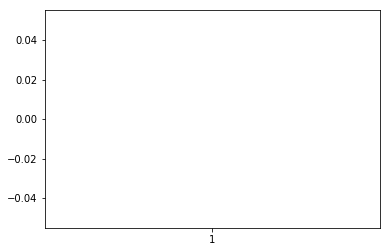

COMMONAREA_AVG


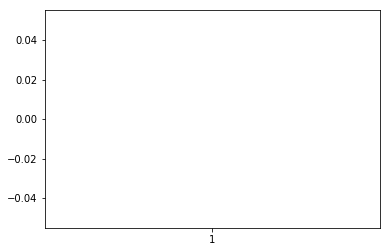

ELEVATORS_AVG


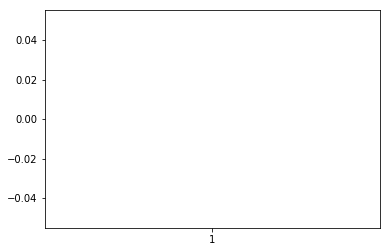

ENTRANCES_AVG


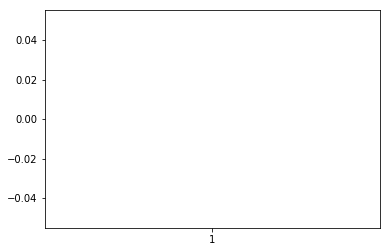

FLOORSMAX_AVG


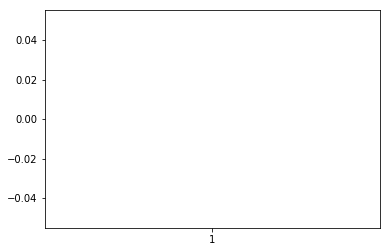

FLOORSMIN_AVG


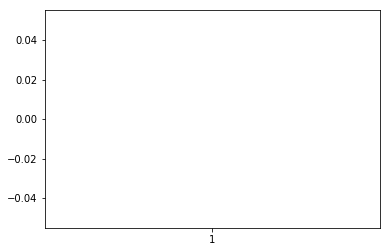

LANDAREA_AVG


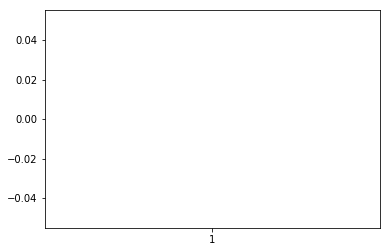

LIVINGAPARTMENTS_AVG


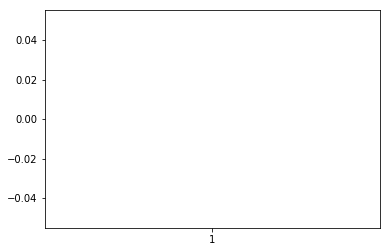

LIVINGAREA_AVG


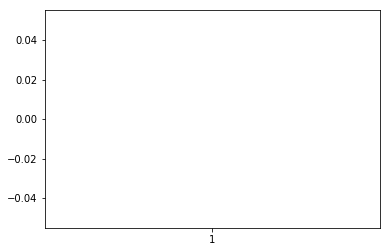

NONLIVINGAPARTMENTS_AVG


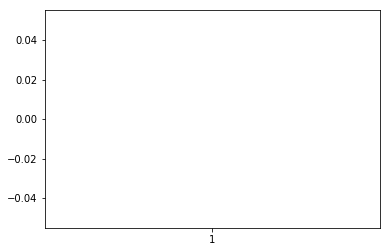

NONLIVINGAREA_AVG


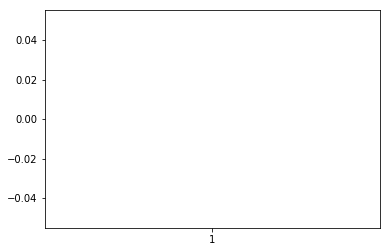

APARTMENTS_MODE


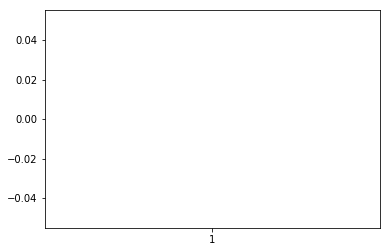

BASEMENTAREA_MODE


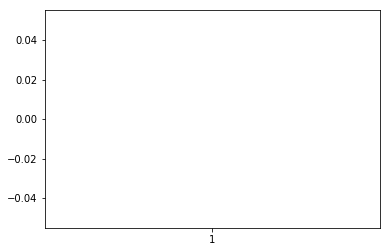

YEARS_BEGINEXPLUATATION_MODE


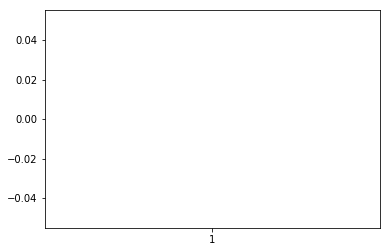

YEARS_BUILD_MODE


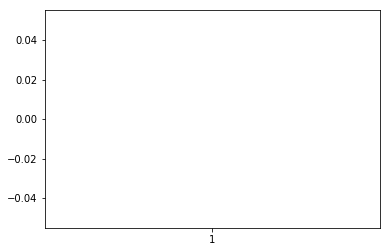

COMMONAREA_MODE


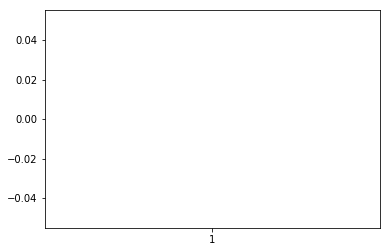

ELEVATORS_MODE


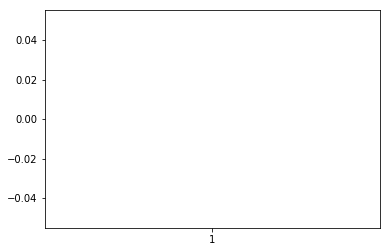

ENTRANCES_MODE


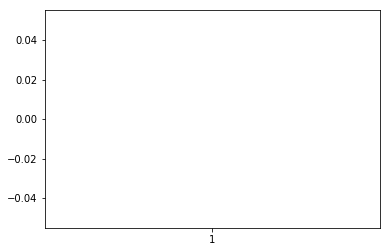

FLOORSMAX_MODE


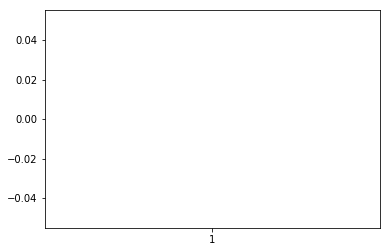

FLOORSMIN_MODE


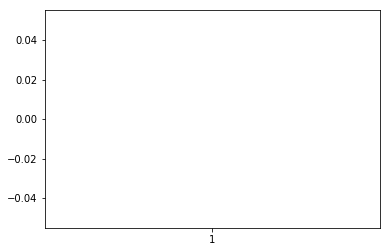

LANDAREA_MODE


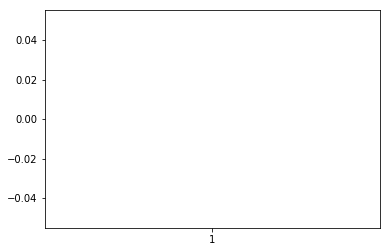

LIVINGAPARTMENTS_MODE


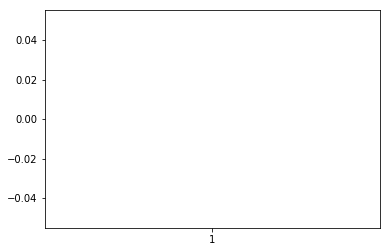

LIVINGAREA_MODE


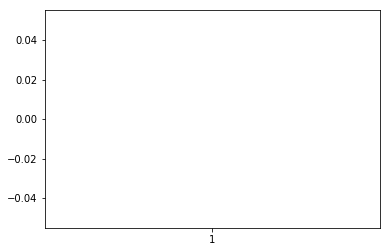

NONLIVINGAPARTMENTS_MODE


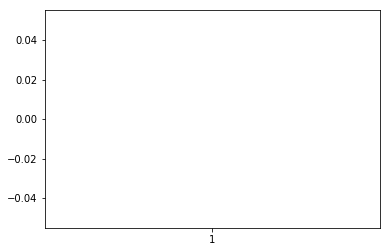

NONLIVINGAREA_MODE


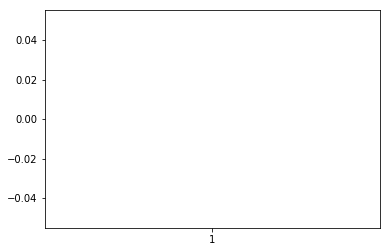

APARTMENTS_MEDI


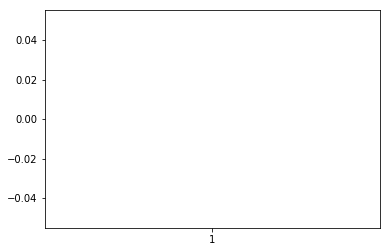

BASEMENTAREA_MEDI


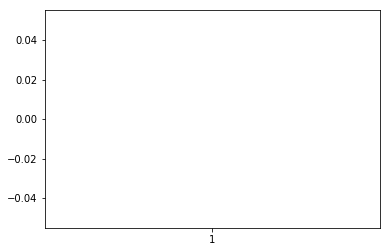

YEARS_BEGINEXPLUATATION_MEDI


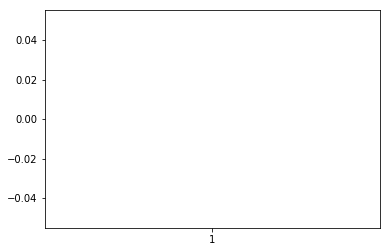

YEARS_BUILD_MEDI


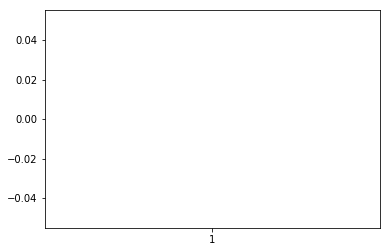

COMMONAREA_MEDI


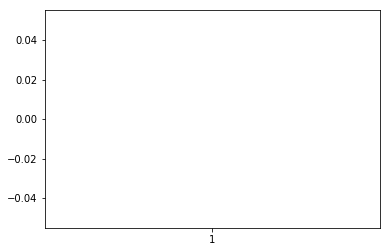

ELEVATORS_MEDI


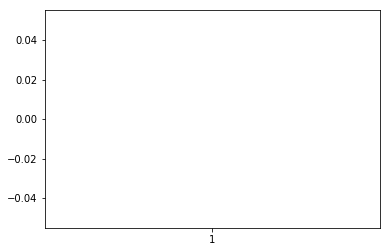

ENTRANCES_MEDI


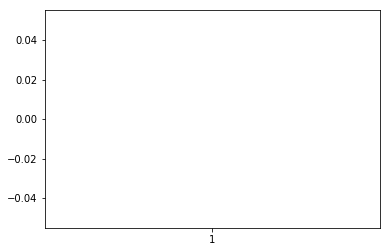

FLOORSMAX_MEDI


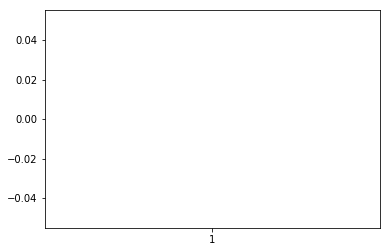

FLOORSMIN_MEDI


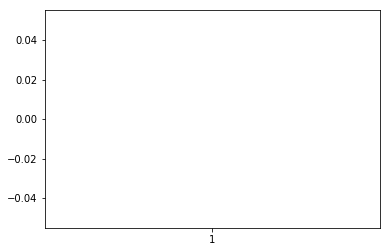

LANDAREA_MEDI


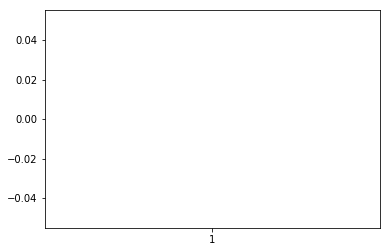

LIVINGAPARTMENTS_MEDI


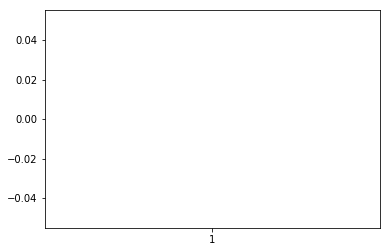

LIVINGAREA_MEDI


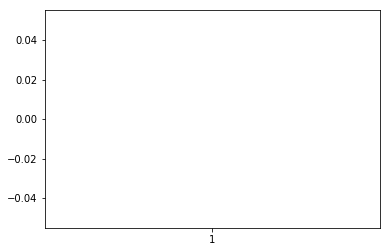

NONLIVINGAPARTMENTS_MEDI


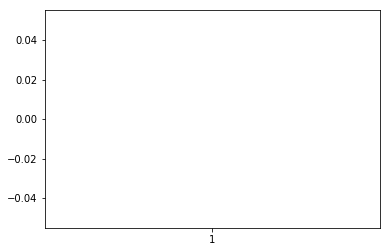

NONLIVINGAREA_MEDI


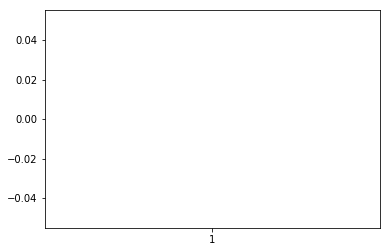

TOTALAREA_MODE


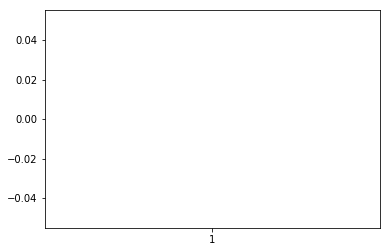

OBS_30_CNT_SOCIAL_CIRCLE


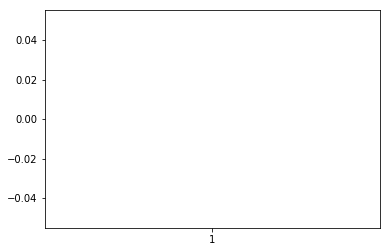

DEF_30_CNT_SOCIAL_CIRCLE


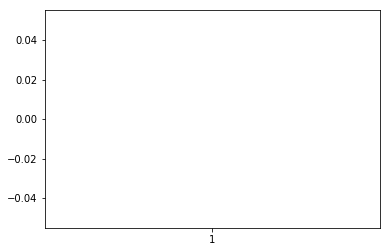

OBS_60_CNT_SOCIAL_CIRCLE


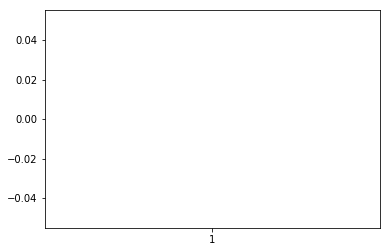

DEF_60_CNT_SOCIAL_CIRCLE


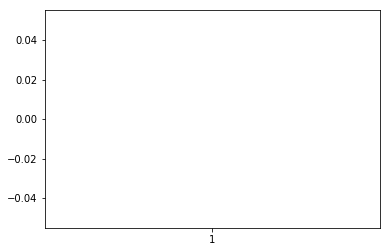

DAYS_LAST_PHONE_CHANGE


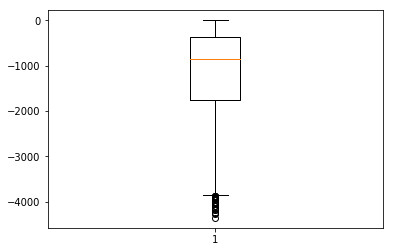

FLAG_DOCUMENT_2


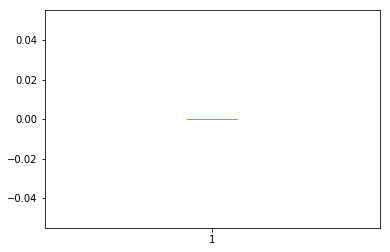

FLAG_DOCUMENT_10


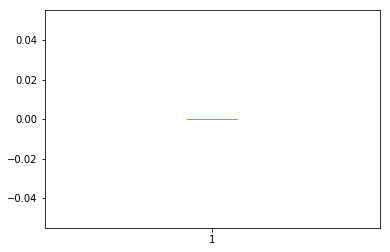

FLAG_DOCUMENT_12


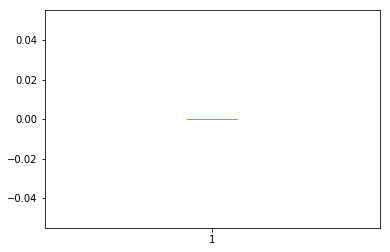

FLAG_DOCUMENT_13


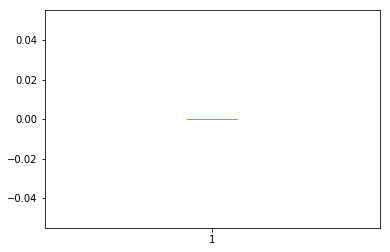

FLAG_DOCUMENT_14


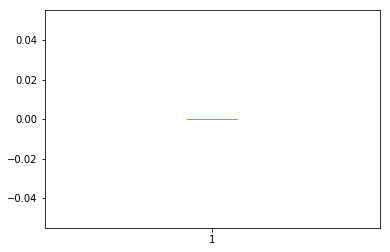

FLAG_DOCUMENT_15


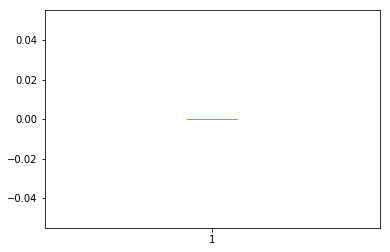

FLAG_DOCUMENT_16


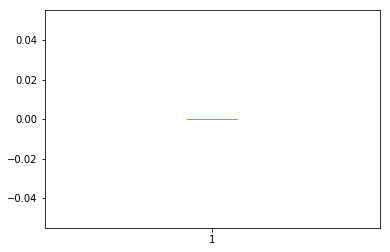

FLAG_DOCUMENT_17


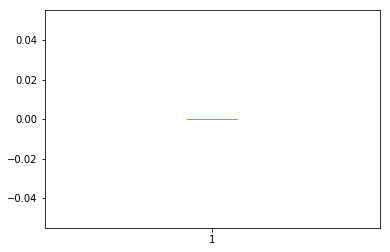

FLAG_DOCUMENT_19


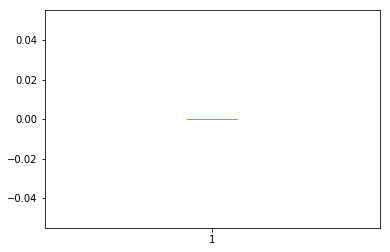

FLAG_DOCUMENT_20


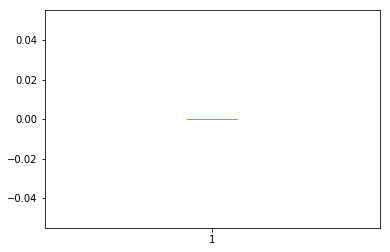

FLAG_DOCUMENT_21


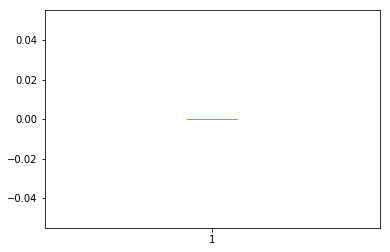

AMT_REQ_CREDIT_BUREAU_HOUR


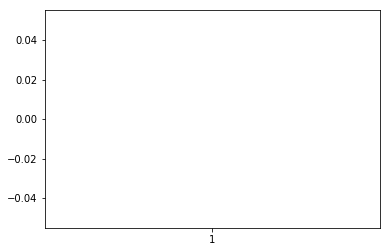

AMT_REQ_CREDIT_BUREAU_DAY


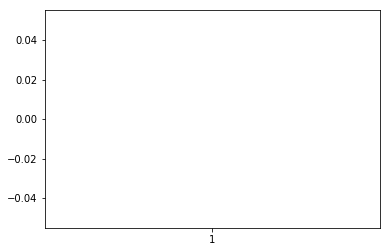

AMT_REQ_CREDIT_BUREAU_WEEK


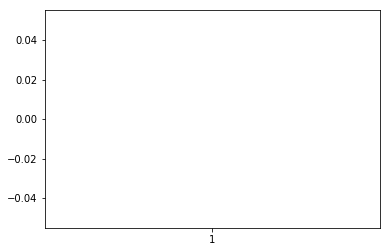

AMT_REQ_CREDIT_BUREAU_MON


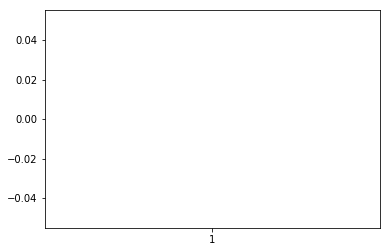

AMT_REQ_CREDIT_BUREAU_QRT


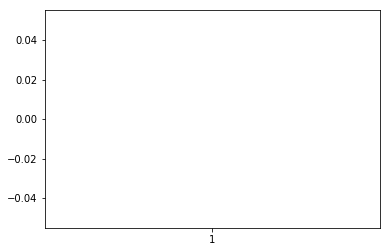

AMT_REQ_CREDIT_BUREAU_YEAR


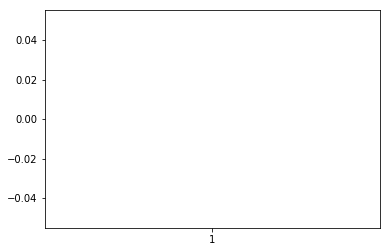

In [6]:
# 檢視這些欄位的數值範圍
for col in numeric_columns:
    print(col)
    plt.boxplot(df[col])
    plt.show()

AMT_INCOME_TOTAL


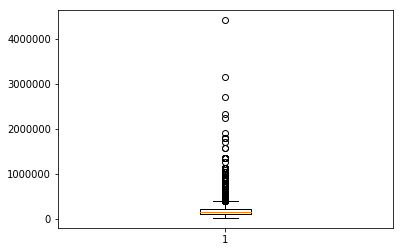

REGION_POPULATION_RELATIVE


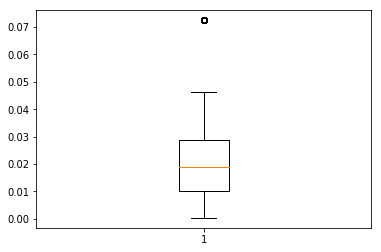

OBS_60_CNT_SOCIAL_CIRCLE


C:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\function_base.py:3652: RuntimeWarning: Invalid value encountered in percentile
  interpolation=interpolation)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1874: RuntimeWarning: invalid value encountered in less_equal
  wiskhi = np.compress(x <= hival, x)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1881: RuntimeWarning: invalid value encountered in greater_equal
  wisklo = np.compress(x >= loval, x)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1889: RuntimeWarning: invalid value encountered in less
  np.compress(x < stats['whislo'], x),
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1890: RuntimeWarning: invalid value encountered in greater
  np.compress(x > stats['whishi'], x)


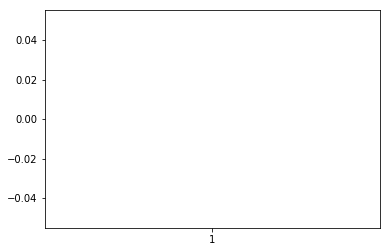

In [7]:
# 從上面的圖檢查的結果，至少這三個欄位好像有點可疑

# AMT_INCOME_TOTAL
# REGION_POPULATION_RELATIVE
# OBS_60_CNT_SOCIAL_CIRCLE
for col in ['AMT_INCOME_TOTAL','REGION_POPULATION_RELATIVE','OBS_60_CNT_SOCIAL_CIRCLE']:
    print(col)
    plt.boxplot(df[col])
    plt.show()

Hints: Emprical Cumulative Density Plot, ECDF, ECDF with Python

In [8]:
def ECDF(data):
    '''
    step1.
    aggregate value's count
    step2.
    sort by index
    step3.
    cumulative sum with it's count
    step4.
    multiply with 1/n
    '''
    return (data.value_counts().sort_index().cumsum()) * 1.0 / len(data)

count    4.874400e+04
mean     1.784318e+05
std      1.015226e+05
min      2.694150e+04
25%      1.125000e+05
50%      1.575000e+05
75%      2.250000e+05
max      4.410000e+06
Name: AMT_INCOME_TOTAL, dtype: float64


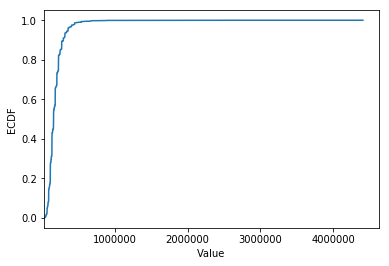

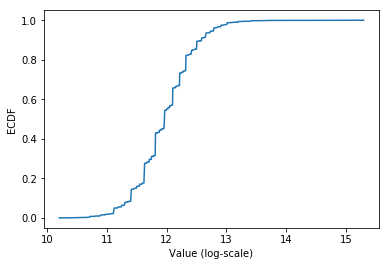

In [9]:
# 最大值離平均與中位數很遠
print(df['AMT_INCOME_TOTAL'].describe())

# 繪製 Empirical Cumulative Density Plot (ECDF)

cdf = ECDF(df['AMT_INCOME_TOTAL'])


plt.plot(list(cdf.index), cdf/cdf.max())
plt.xlabel('Value')
plt.ylabel('ECDF')
plt.xlim([cdf.index.min(), cdf.index.max() * 1.05]) # 限制顯示圖片的範圍
plt.ylim([-0.05,1.05]) # 限制顯示圖片的範圍

plt.show()

# 改變 y 軸的 Scale, 讓我們可以正常檢視 ECDF
plt.plot(np.log(list(cdf.index)), cdf/cdf.max())
plt.xlabel('Value (log-scale)')
plt.ylabel('ECDF')

plt.ylim([-0.05,1.05]) # 限制顯示圖片的範圍

plt.show()

count    48744.000000
mean         0.021226
std          0.014428
min          0.000253
25%          0.010006
50%          0.018850
75%          0.028663
max          0.072508
Name: REGION_POPULATION_RELATIVE, dtype: float64


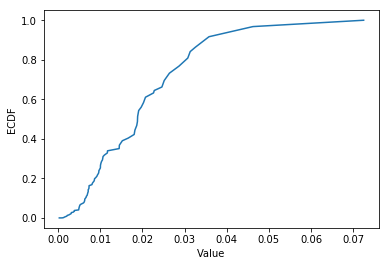

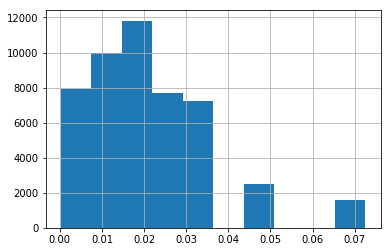

0.035792    2582
0.046220    2497
0.030755    1991
0.026392    1805
0.028663    1740
0.025164    1599
0.031329    1595
0.072508    1565
0.019101    1466
0.020713    1327
0.018850    1288
0.020246    1146
0.018634    1116
0.032561    1088
0.015221    1085
0.018209    1083
0.022625    1060
0.018801     951
0.018029     897
0.024610     860
0.014520     846
0.019689     805
0.010032     676
0.010006     674
0.007020     659
0.016612     652
0.022800     601
0.004960     583
0.014464     552
0.011703     523
            ... 
0.008230     275
0.007114     269
0.006305     269
0.008575     269
0.008019     268
0.005084     267
0.007274     262
0.002042     256
0.003122     252
0.008068     249
0.006671     241
0.003813     235
0.008866     228
0.006852     206
0.006296     205
0.003818     180
0.005313     180
0.006233     178
0.002134     173
0.005144     169
0.005002     156
0.004849     155
0.002506     119
0.003541      92
0.001417      79
0.001276      69
0.001333      28
0.000938      

In [10]:
# 最大值落在分布之外
print(df['REGION_POPULATION_RELATIVE'].describe())

# 繪製 Empirical Cumulative Density Plot (ECDF)
cdf = ECDF(df['REGION_POPULATION_RELATIVE'])

plt.plot(list(cdf.index), cdf/cdf.max())
plt.xlabel('Value')
plt.ylabel('ECDF')
plt.ylim([-0.05,1.05]) # 限制顯示圖片的範圍
plt.show()

df['REGION_POPULATION_RELATIVE'].hist()
plt.show()

df['REGION_POPULATION_RELATIVE'].value_counts()

# 就以這個欄位來說，雖然有資料掉在分布以外，也不算異常，僅代表這間公司在稍微熱鬧的地區有的據點較少，
# 導致 region population relative 在少的部分較為密集，但在大的部分較為疏漏

count    48715.000000
mean         1.435738
std          3.580125
min          0.000000
25%          0.000000
50%          0.000000
75%          2.000000
max        351.000000
Name: OBS_60_CNT_SOCIAL_CIRCLE, dtype: float64


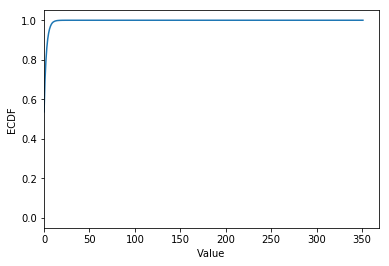

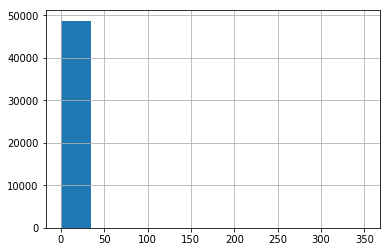

351.0        1
349.0        2
29.0         1
23.0         3
22.0         1
21.0         2
20.0         8
19.0         6
18.0        12
17.0        16
16.0        17
15.0        32
14.0        45
13.0        67
12.0       106
11.0       131
10.0       216
9.0        334
8.0        490
7.0        677
6.0       1030
5.0       1441
4.0       2199
3.0       3262
2.0       4735
1.0       7741
0.0      26140
Name: OBS_60_CNT_SOCIAL_CIRCLE, dtype: int64


In [11]:
# 最大值落在分布之外
print(df['OBS_60_CNT_SOCIAL_CIRCLE'].describe())

# 繪製 Empirical Cumulative Density Plot (ECDF)


cdf = ECDF(df['OBS_60_CNT_SOCIAL_CIRCLE'])

plt.plot(list(cdf.index), cdf/cdf.max())
plt.xlabel('Value')
plt.ylabel('ECDF')
plt.xlim([cdf.index.min() * 0.95, cdf.index.max() * 1.05])
plt.ylim([-0.05,1.05]) # 限制顯示圖片的範圍
plt.show()

df['OBS_60_CNT_SOCIAL_CIRCLE'].hist()
plt.show()
print(df['OBS_60_CNT_SOCIAL_CIRCLE'].value_counts().sort_index(ascending = False))

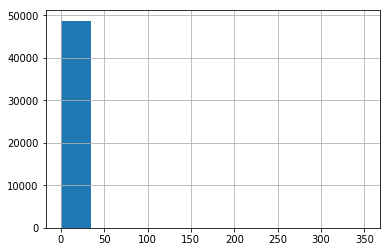

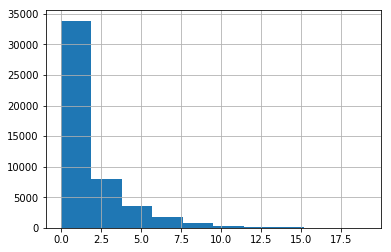

In [12]:
# 把一些極端值暫時去掉，在繪製一次 Histogram
# 選擇 OBS_60_CNT_SOCIAL_CIRCLE 小於 20 的資料點繪製
df['OBS_60_CNT_SOCIAL_CIRCLE'].hist()
plt.show()
df[df['OBS_60_CNT_SOCIAL_CIRCLE']<20]['OBS_60_CNT_SOCIAL_CIRCLE'].hist()
plt.show()